In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Book Dataset

In [2]:
book=pd.read_csv("D:\\DATA SCIENCE\\ASSIGNMENTS\\Associate rules\\book.csv")

In [3]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Apriori algorithm

# Association rules with 10% support and 50% confidence

In [4]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [21]:
#with 50% 
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.5)
rules     


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [22]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [23]:
rules[rules.lift>0.2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


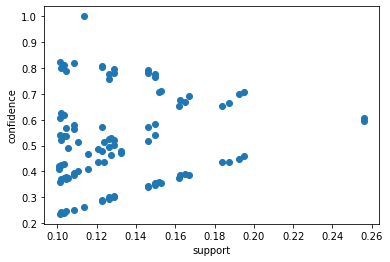

In [26]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Association rules with 15% support and 80% confidence

In [41]:
frequent_itemsets=apriori(book,min_support=0.15,use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [52]:
#with 80% confidence
rules1=association_rules(frequent_itemsets,metric='lift',min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [54]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [55]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


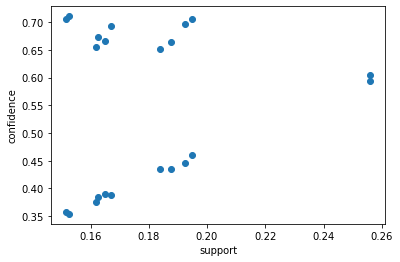

In [50]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# My Movie Dataset

In [5]:
movie=pd.read_csv("D:\DATA SCIENCE\ASSIGNMENTS\Associate rules\my_movies.csv")

In [6]:
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
movie1=pd.get_dummies(movie)
movie1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Apriori Algorithm

# Association rules with 10% support and 90% confidence

In [17]:
frequent_itemsets=apriori(movie1,min_support=0.1,use_colnames=True)

In [18]:
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Sixth Sense, Green Mile, V3_Harry Potter1, Ha..."
1393,0.1,"(Sixth Sense, Green Mile, V3_Harry Potter1, LO..."
1394,0.1,"(Sixth Sense, Green Mile, V3_Harry Potter1, Ha..."
1395,0.1,"(Green Mile, V3_Harry Potter1, Harry Potter1, ..."


In [21]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64211,(V5_LOTR2),"(Sixth Sense, Green Mile, V3_Harry Potter1, Ha...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64212,(V4_Green Mile),"(Sixth Sense, Green Mile, V3_Harry Potter1, Ha...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64213,(LOTR1),"(Sixth Sense, Green Mile, V3_Harry Potter1, Ha...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(V1_Sixth Sense),"(Sixth Sense, Green Mile, V3_Harry Potter1, Ha...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [24]:
rules.sort_values('lift',ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1587,"(Gladiator, Sixth Sense)","(V1_Sixth Sense, Green Mile)",0.5,0.2,0.1,0.2,1.0,0.00,1.0
1627,"(Gladiator, Sixth Sense)","(Green Mile, V4_Green Mile)",0.5,0.2,0.1,0.2,1.0,0.00,1.0
1632,"(Green Mile, V4_Green Mile)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
202,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.2,1.0,0.00,1.0
212,"(Gladiator, Sixth Sense)",(V1_Sixth Sense),0.5,0.2,0.1,0.2,1.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...
27870,"(V5_LOTR2, LOTR2, V3_Harry Potter1, LOTR1)","(V1_Sixth Sense, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
27871,"(V1_Sixth Sense, V5_LOTR2, LOTR2, V3_Harry Pot...","(V2_LOTR1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
27872,"(V5_LOTR2, LOTR2, V2_LOTR1, V3_Harry Potter1)","(V1_Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
27855,"(V1_Sixth Sense, LOTR1)","(V4_Green Mile, LOTR2, V2_LOTR1, V3_Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [26]:
rules[rules.lift>5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
112,(Harry Potter2),(V1_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
113,(V1_Harry Potter1),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
114,(Harry Potter2),(V2_Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
115,(V2_Harry Potter2),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
120,(LOTR),(V2_LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
64204,"(V2_LOTR1, LOTR1)","(Sixth Sense, Green Mile, V3_Harry Potter1, Ha...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64205,"(V1_Sixth Sense, V2_LOTR1)","(Sixth Sense, Green Mile, V3_Harry Potter1, Ha...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64208,(V3_Harry Potter1),"(Sixth Sense, Green Mile, Harry Potter1, LOTR2...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64211,(V5_LOTR2),"(Sixth Sense, Green Mile, V3_Harry Potter1, Ha...",0.1,0.1,0.1,1.0,10.0,0.09,inf


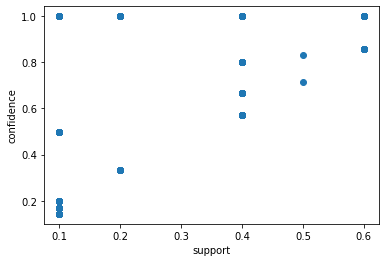

In [34]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Association values with 30% support and 70% confidence

In [27]:
frequent_itemsets1=apriori(movie1,min_support=0.3,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(V2_Patriot, Patriot, Sixth Sense, Gladiator, ..."
59,0.4,"(V2_Patriot, V1_Gladiator, Sixth Sense, Gladia..."
60,0.4,"(V2_Patriot, V1_Gladiator, Patriot, Sixth Sens..."
61,0.4,"(V2_Patriot, V1_Gladiator, Patriot, Gladiator,..."


In [28]:
rules1=association_rules(frequent_itemsets1,metric='lift',min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V1_Gladiator),"(V2_Patriot, Patriot, Sixth Sense, Gladiator, ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Patriot),"(V2_Patriot, V1_Gladiator, Sixth Sense, Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(Sixth Sense),"(V2_Patriot, V1_Gladiator, Patriot, Gladiator,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Gladiator),"(V2_Patriot, V1_Gladiator, Patriot, Sixth Sens...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [29]:
rules1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
601,(V3_Sixth Sense),"(V2_Patriot, V1_Gladiator, Patriot, Sixth Sens...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
479,(V3_Sixth Sense),"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
492,"(V1_Gladiator, Patriot, V3_Sixth Sense)","(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
491,"(Sixth Sense, V1_Gladiator, Patriot)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
489,"(V2_Patriot, V3_Sixth Sense, Patriot)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
37,"(Gladiator, V1_Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
75,(Sixth Sense),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
34,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
203,(Sixth Sense),"(Gladiator, V2_Patriot, V1_Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [33]:
rules1[rules1.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,"(Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
70,(V3_Sixth Sense),"(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
78,"(Sixth Sense, V1_Gladiator)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
83,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
85,"(Sixth Sense, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
...,...,...,...,...,...,...,...,...,...
589,"(V1_Gladiator, V3_Sixth Sense)","(Gladiator, V2_Patriot, Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
590,"(Sixth Sense, Patriot)","(Gladiator, V2_Patriot, V1_Gladiator, V3_Sixth...",0.4,0.4,0.4,1.0,2.5,0.24,inf
592,"(V3_Sixth Sense, Patriot)","(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se...",0.4,0.4,0.4,1.0,2.5,0.24,inf
595,"(Gladiator, V3_Sixth Sense)","(V2_Patriot, V1_Gladiator, Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf


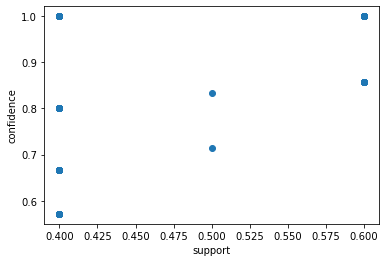

In [35]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()